## Wine Quality Prediction Using SGD
### MANJUNATH MULINTI
### Department: COMPUTER SCIENCE


Description: In this homework, you are going to implement the stochastic gradient optimization (mini-batch) to solve the wine quality prediction problem. Using the following code as your template. Specific requirements:

1. Use the SGD function definition given in the code (def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):); and do not change it.
2. Shuffle data (X and Y) at the beginning of each epoch. (10 points)
3. Decay learning rate at the end of each epoch. (10 points)
4. Choose the batch size in the powers of 2: 4, 8, 16, 32, ... (5 points)
5. Save the loss and weight of each epoch. (10 points)
6. Split the dataset into training (70%) and test (30%) sets. (5 points)
7. Print out the MSE and MAE of GD for both the training and test sets (using w_star). (15 points)
8. Print out the MSE and MAE of SGD for both the training and test sets (using w_star). (15 points)
9. Plot the loss curve for SGD. (10 points)
10. Plot the mse curves on the training and test sets over the weight sequence (w_hist). (20 points)

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## (1) Data preparation
df=pd.read_csv('winequality-white.csv', sep = ';')
df
X = df.values[:, :11]
Y = df.values[:, 11]
print('Data shape:', 'X:', X.shape, 'Y:', Y.shape)

# data normalization
min_vals = np.min(X, axis = 0)
max_vals = np.max(X, axis = 0)
X1 = (X-min_vals)/(max_vals-min_vals)

##(2) Assume a linear mode that y = w0*1 + w_1*x_1 +w_2*x_2+...+ w_11*x_11
def predict(X, w):
    '''
    X: input feature vectors:m*n
    w: weights
    
    return Y_hat
    '''
    # Prediction
    Y_hat = np.zeros((X.shape[0]))
    for idx, x in enumerate(X):          
        y_hat = w[0] + np.dot(w[1:].T, np.c_[x]) # linear model
        Y_hat[idx] = y_hat    
    return Y_hat

## (3) Loss function: L = 1/2 * sum(y_hat_i - y_i)^2
def loss(w, X, Y):
    '''
    w: weights
    X: input feature vectors
    Y: targets
    '''
    Y_hat = predict(X, w)
    loss = 1/2* np.sum(np.square(Y - Y_hat))
    
    return loss

# Optimization: Gradient Descent
def GD(X, Y, lr = 0.001, delta = 0.01, max_iter = 100):
    '''
    X: training data
    Y: training target
    lr: learning rate
    max_iter: the max iterations
    '''
    
    m = len(Y)
    b = np.reshape(Y, [Y.shape[0],1])
    w = np.random.rand(X.shape[1] + 1, 1)
    A = np.c_[np.ones((m, 1)), X]
    gradient = A.T.dot(np.dot(A, w)-b)
    
    loss_hist = np.zeros(max_iter) # history of loss
    w_hist = np.zeros((max_iter, w.shape[0])) # history of weight
    loss_w = 0
    i = 0                  
    while(np.linalg.norm(gradient) > delta) and (i < max_iter):
        w_hist[i,:] = w.T
        loss_w = loss(w, X, Y)
        print(i, 'loss:', loss_w)
        loss_hist[i] = loss_w
        
        w = w - lr*gradient        
        gradient = A.T.dot(np.dot(A, w)-b) # update the gradient using new w
        i = i + 1
        
    w_star = w  
    return w_star, loss_hist, w_hist

Data shape: X: (4898, 11) Y: (4898,)


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y,test_size=0.3)

0 loss: 27152.65060609179
1 loss: 5422.683098902984
2 loss: 1957.927210788317
3 loss: 1403.3817052763604
4 loss: 1312.563550992962
5 loss: 1295.6781465345728
6 loss: 1290.6189854081713
7 loss: 1287.489489481793
8 loss: 1284.7116224506028
9 loss: 1282.0327618137871
(10, 12)


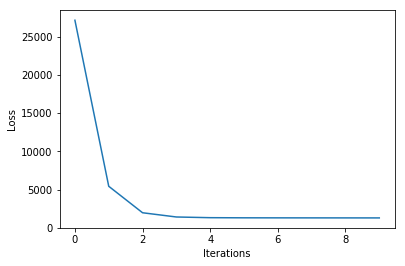

In [15]:
# example
w_star, loss_hist, w_hist = GD(x_train, y_train, lr = 0.0001, delta = 0.01, max_iter = 10)
print(w_hist.shape)
# show the Loss curve
from matplotlib import pyplot as plt
plt.plot(range(10), loss_hist)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error
print ('Mean Absolute Error')
#For training case
y_pred = predict(x_train, w_star)
mae = mean_absolute_error(y_train, y_pred)
print ('For training dataset: {}'.format(mae))
#For testing case
y_pred = predict(x_test, w_star)
mae = mean_absolute_error(y_test, y_pred)
print ('For test dataset: {}'.format(mae))

Mean Absolute Error
For training dataset: 0.6757653256887706
For test dataset: 0.6797874585538624


In [17]:
from sklearn.metrics import mean_squared_error
print ('Mean Squared Error')
#For training case
y_pred = predict(x_train, w_star)
mse = mean_squared_error(y_train, y_pred)
print ('For training dataset: {}'.format(mse))
#For testing case
y_pred = predict(x_test, w_star)
mse = mean_squared_error(y_test, y_pred)
print ('For test dataset: {}'.format(mse))

Mean Squared Error
For training dataset: 0.74644778099104
For test dataset: 0.7742109002761832


In [55]:
# Optimization: implement the minibatch Gradient Descent approach
def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):
    '''
    X: training data
    Y: training target
    lr: learning rate
    batch_size: batch size
    epoch: number of max epoches
    
    return: w_star, loss_hist, w_hist
    '''
    
    m = len(Y)
    b = np.reshape(Y, [Y.shape[0], 1])
    w = np.random.rand(X.shape[1] + 1, 1)
    A = np.c_[np.ones((m, 1)), X]
    gradient = A.T.dot(np.dot(A, w) -b)
    loss_hist = np.zeros(epoch)
    myloss = []
    mylosstemp = 0
    xvalues = []
    w_hist = np.zeros((epoch, w.shape[0]))
    loss_w = 0
    counter = 0
    temp = 0
    for i in range(epoch):
        shuffled_indices = np.random.permutation(m)
        A_shuffled = A[shuffled_indices]
        b_shuffled = b[shuffled_indices]
        for j in range(int(m/batch_size)):
            temp = temp + 1
            xi = A_shuffled[j:j+batch_size]
            yi = b_shuffled[j:j+batch_size]
            gradients = 2/batch_size * xi.T.dot(xi.dot(w) - yi)
            #decaying learning rate
            momentum = 0.9
            lrate = lr * 1/(1+momentum*i)
            w = w - lrate*gradients 
            xi_temp = np.delete(xi, 0, 1)
            loss_w = loss(w, xi_temp, yi)
            loss_hist[i] = loss_w
            
        myloss.append(loss_w)
        counter = counter + 1
        xvalues.append(counter)
        
            
        w_hist[i,:] = w.T
        #print(i, loss_hist[i])
    
    w_star = w  
    return w_star, loss_hist, w_hist, myloss, xvalues

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y,test_size=0.3)

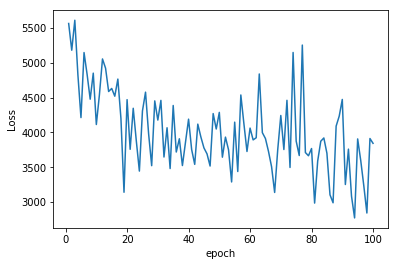

In [57]:
import math
w_star, loss_hist, w_hist, myloss, xvalues = SGD(X1, Y, lr = 0.0001, epoch = 100)
#print(X1.shape)
#print(Y.shape)
#print (len(xvalues))
#print (len(myloss))
# show the Loss curve
from matplotlib import pyplot as plt
plt.plot(xvalues, myloss)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

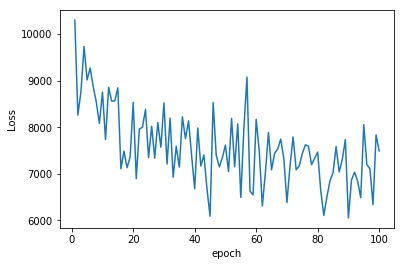

In [58]:
import math
w_star, loss_hist, w_hist, myloss, xvalues = SGD(x_train, y_train, lr = 0.0001, epoch = 100)
#print (len(xvalues))
#print (len(myloss))
# show the Loss curve
#print(x_train.shape)
#print(y_train.shape)
from matplotlib import pyplot as plt
plt.plot(xvalues, myloss)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

In [59]:
from sklearn.metrics import mean_absolute_error
print ('Mean Absolute Error for SGD')
#For training case
y_pred = predict(x_train, w_star)
mae = mean_absolute_error(y_train, y_pred)
print ('For training dataset: {}'.format(mae))
#For testing case
y_pred = predict(x_test, w_star)
mae = mean_absolute_error(y_test, y_pred)
print ('For test dataset: {}'.format(mae))

Mean Absolute Error for SGD
For training dataset: 3.5768982914594982
For test dataset: 3.5216538928162633


In [60]:
from sklearn.metrics import mean_squared_error
print ('Mean Squared Error of SGD')
#For training case
y_pred = predict(x_train, w_star)
mse = mean_squared_error(y_train, y_pred)
print ('For training dataset: {}'.format(mse))
#For testing case
y_pred = predict(x_test, w_star)
mse = mean_squared_error(y_test, y_pred)
print ('For test dataset: {}'.format(mse))

Mean Squared Error of SGD
For training dataset: 13.531742052489975
For test dataset: 13.126341143224968


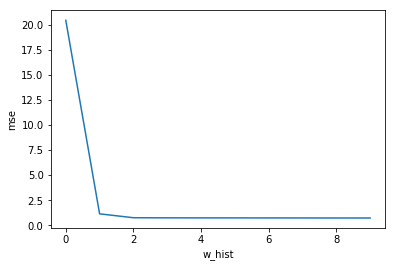

In [48]:
mse = np.zeros(w_hist.shape[0])
#print(mse)
#print(len(w_hist))
for i in range(len(w_hist)):
    y_pred = predict(x_test,w_hist[i])
    mse[i] = mean_squared_error(y_test, y_pred)
    
    

    #mse curves
from matplotlib import pyplot as plt
plt.plot(range(len(w_hist)), mse)
plt.xlabel('w_hist')
plt.ylabel('mse')
plt.show()
    

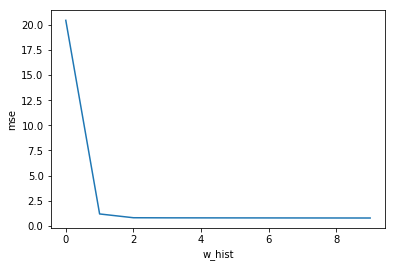

In [49]:
mse = np.zeros(w_hist.shape[0])
#print(mse)
#print(len(w_hist))
for i in range(len(w_hist)):
    y_pred = predict(x_train,w_hist[i])
    mse[i] = mean_squared_error(y_train, y_pred)
    
    

 #mse curves   
from matplotlib import pyplot as plt
plt.plot(range(len(w_hist)), mse)
plt.xlabel('w_hist')
plt.ylabel('mse')
plt.show()
    

0 loss: 50089.86457033329
1 loss: 2863.5255666360313
2 loss: 1932.8064592772844
3 loss: 1907.127768382396
4 loss: 1899.3489322660016
5 loss: 1892.1231402045264
6 loss: 1885.1035348792207
7 loss: 1878.275846752529
8 loss: 1871.6326255928955
9 loss: 1865.1668594997334


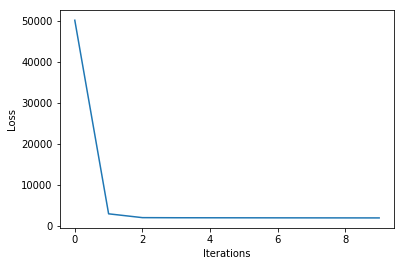

In [33]:
# example
w_star, loss_hist, w_hist = GD(X1, Y, lr = 0.0001, delta = 0.01, max_iter = 10)

# show the Loss curve
from matplotlib import pyplot as plt
plt.plot(range(10), loss_hist)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()